Parameter initializations.

In [519]:
# Setting model parameters
Du = 0.01
Dv = 2.0
c = 0.01
e = 0.02
S = 0.05
k = 0.65
gamma = 30000

In [532]:
# Setting simulation parameters
#? needs fixing
size = 200
dx = 2./size
dt = .00001

In [594]:
U = np.random.rand(size,size)*0.02
V = np.random.rand(size,size)*0.02

Imports and function definitions.

In [584]:
# Imports
import numpy as np
import matplotlib.pyplot as pp
from IPython.core.pylabtools import figsize
import warnings
warnings.filterwarnings('ignore')
figsize(14,7)

In [534]:
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=pp.cm.bone_r,
              interpolation='none',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

In [535]:
def laplacian(Z):
    Ztop = Z[0:-2,1:-1]
    Zleft = Z[1:-1,0:-2]
    Zbottom = Z[2:,1:-1]
    Zright = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return (Ztop+Zleft+Zbottom+Zright-4*Zcenter)/dx**2

In [551]:
def rk(A,B,dx,dt):
    Un = np.empty(A.shape)
    Vn = np.empty(B.shape)
    # Discard borders
    Uc = A[1:-1, 1:-1]
    Vc = B[1:-1, 1:-1]
    # Calculate slopes
    Un[1:-1, 1:-1] = (Du/Dv) * laplacian(A) + gamma * (Uc**2/(np.ones(Uc.shape)+k*Uc**2)/Vc - c*Uc)
    Vn[1:-1, 1:-1] = laplacian(B) + gamma * (Uc**2 - e*Vc + np.full(Vc.shape,S))
    
    # Neumann boundary conditions: du/dx=0, positive values
    for Z in (Un, Vn):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]
    return Un,Vn

def rk2(U,V,dx,dt):
    U1,V1 = rk(U,V,dx,dt)
    S1 = U1*(dt/2.)
    T1 = V1*(dt/2.)
    U2,V2 = rk(U+S1,V+T1,dx,dt)
    return U+dt*U2, V+dt*V2
    

In [595]:
def plot(n=1000,cont=False,ax=None):
    global U,V
    if not cont:
        # Reset to initial conditions
        U = np.random.rand(size,size)*0.02
        V = np.random.rand(size,size)*0.02
    # Simulation for n timesteps
    for i in range(n):
        U,V = rk2(U,V,dx,dt)
    if ax:
        show_patterns(U,ax)
    else:
        pp.close("all")
        fig,ax = pp.subplots(1,1)
        show_patterns(U,ax)
        return fig

A first comparison of different values of S and attempt to observe the transition from stripes to spots described in the paper.

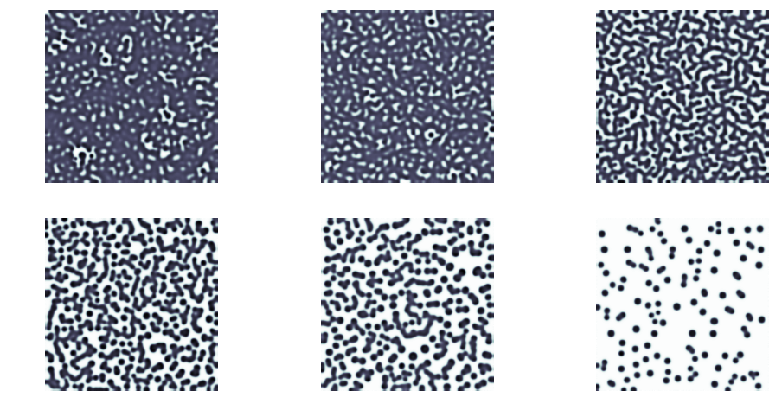

In [588]:
# Setting model parameters
gamma = 15000
pp.close('all')
fig,axs = pp.subplots(2,3)
for ax,b in zip([n for m in axs for n in m],[0.005,0.05,0.1,0.15,0.2,0.5]):
    S = b
    plot(n=10000,ax=ax)
fig

Comparing small values of S at shorter reactions times.

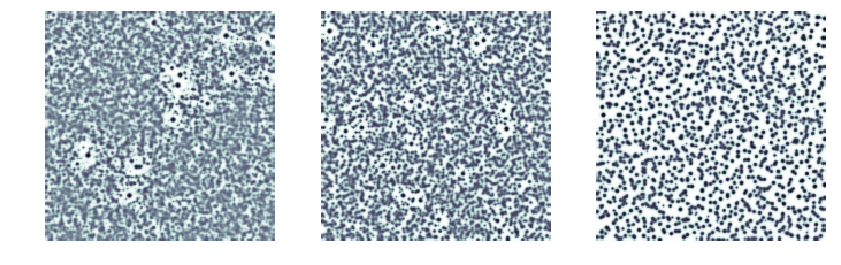

In [591]:
# Setting model parameters
gamma = 15000
pp.close('all')
fig,axs = pp.subplots(1,3)
for ax,b in zip([m for m in axs],[0.005,0.05,0.1]):
    S = b
    plot(n=2000,ax=ax)
fig

Comparing some higher values of S at longer reaction times.

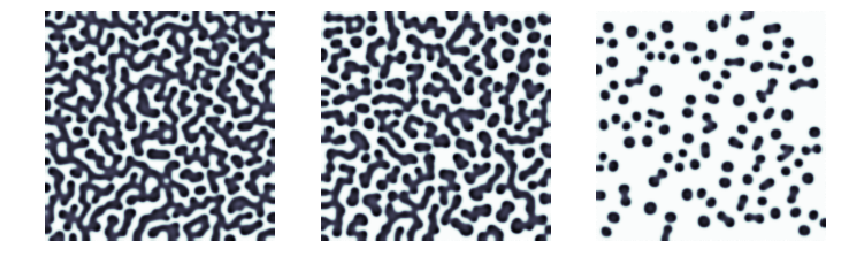

In [592]:
# Setting model parameters
gamma = 15000
pp.close('all')
fig,axs = pp.subplots(1,3)
for ax,b in zip([m for m in axs],[0.15,0.2,0.5]):
    S = b
    plot(n=20000,ax=ax)
fig

First, a look at the initial stages for S=0.05 simulated in 9 steps of 250 iterations.

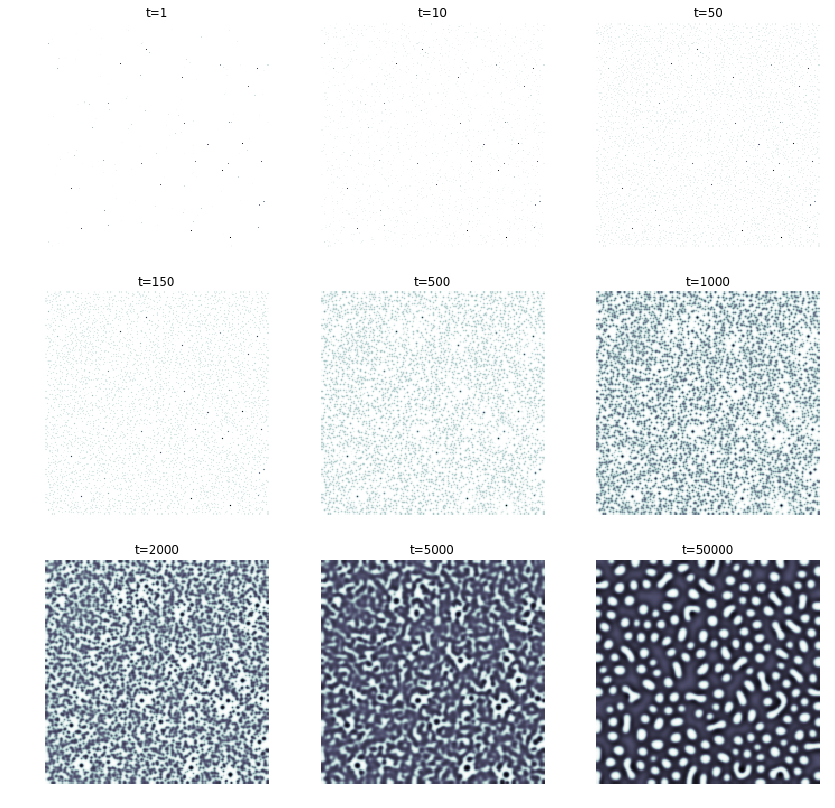

In [617]:
figsize(14,14)
U = np.random.rand(size,size)*0.02
V = np.random.rand(size,size)*0.02
# Setting model parameters
S=0.05
pp.close('all')
fig,axs = pp.subplots(3,3)
j=0
for i,ax in zip([1,9,40,100,350,500,1000,3000,45000],[n for m in axs for n in m]):
    j=j+i
    ax.set_title("t="+str(j))
    plot(n=i,ax=ax,cont=True)
fig

Next we're looking at S=0.5 in progressively larger steps up to 200,000 iterations to see if the system settles and what the steady state looks like.

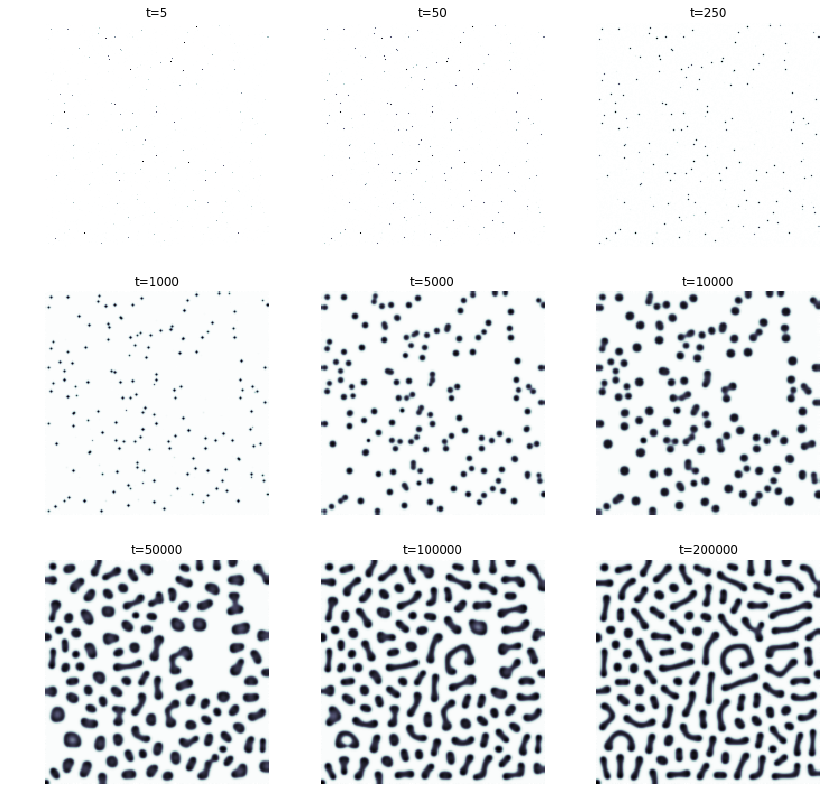

In [616]:
figsize(14,14)
U = np.random.rand(size,size)*0.02
V = np.random.rand(size,size)*0.02
# Setting model parameters
S=0.5
pp.close('all')
fig,axs = pp.subplots(3,3)
j=0
for i,ax in zip([5,45,200,750,4000,5000,40000,50000,100000],[n for m in axs for n in m]):
    j=j+i
    ax.set_title("t="+str(j))
    plot(n=i,ax=ax,cont=True)
fig